In [1]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

Dataset URL: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic
License(s): other
100% 785M/786M [00:38<00:00, 22.9MB/s]
100% 786M/786M [00:38<00:00, 21.3MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-cancer9-classesisic.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

# Load the dataset
data_dir = "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

# Define image size
img_height, img_width = 128, 128

# Data Preprocessing
def load_data(data_dir):
    images = []
    labels = []
    classes = os.listdir(data_dir)

    for label in classes:
        class_dir = os.path.join(data_dir, label)
        if os.path.isdir(class_dir):
            for img in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img)
                image = cv2.imread(img_path)
                image = cv2.resize(image, (img_height, img_width))
                images.append(image)
                labels.append(classes.index(label))

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

images, labels = load_data(data_dir)

# Normalize images
images = images / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

datagen.fit(X_train)


In [4]:
print(X_test.shape)

(448, 128, 128, 3)


In [5]:
print(X_train.shape)

(1791, 128, 128, 3)


In [6]:
X_train[0]

array([[[0.49019608, 0.48235294, 0.65882353],
        [0.49803922, 0.47843137, 0.65490196],
        [0.50588235, 0.48235294, 0.66666667],
        ...,
        [0.46666667, 0.4745098 , 0.61568627],
        [0.4627451 , 0.46666667, 0.60784314],
        [0.45882353, 0.45882353, 0.6       ]],

       [[0.50980392, 0.50588235, 0.67058824],
        [0.50588235, 0.48627451, 0.66666667],
        [0.53333333, 0.50980392, 0.67058824],
        ...,
        [0.46666667, 0.47058824, 0.61568627],
        [0.46666667, 0.47058824, 0.61176471],
        [0.47058824, 0.47843137, 0.61568627]],

       [[0.51764706, 0.49803922, 0.6745098 ],
        [0.5254902 , 0.50980392, 0.6627451 ],
        [0.54117647, 0.51372549, 0.6745098 ],
        ...,
        [0.45490196, 0.45098039, 0.61568627],
        [0.46666667, 0.47058824, 0.6       ],
        [0.47843137, 0.48235294, 0.61568627]],

       ...,

       [[0.42745098, 0.43921569, 0.61176471],
        [0.41176471, 0.42745098, 0.60392157],
        [0.39607843, 0

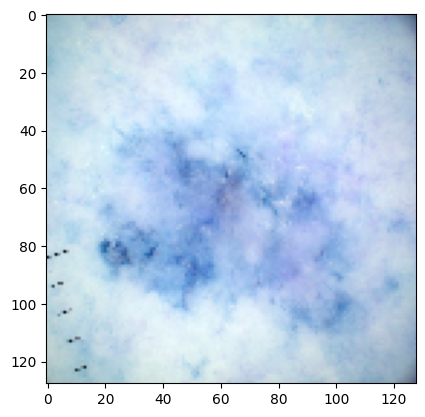

In [7]:
plt.imshow(X_train[1000])
plt.show()

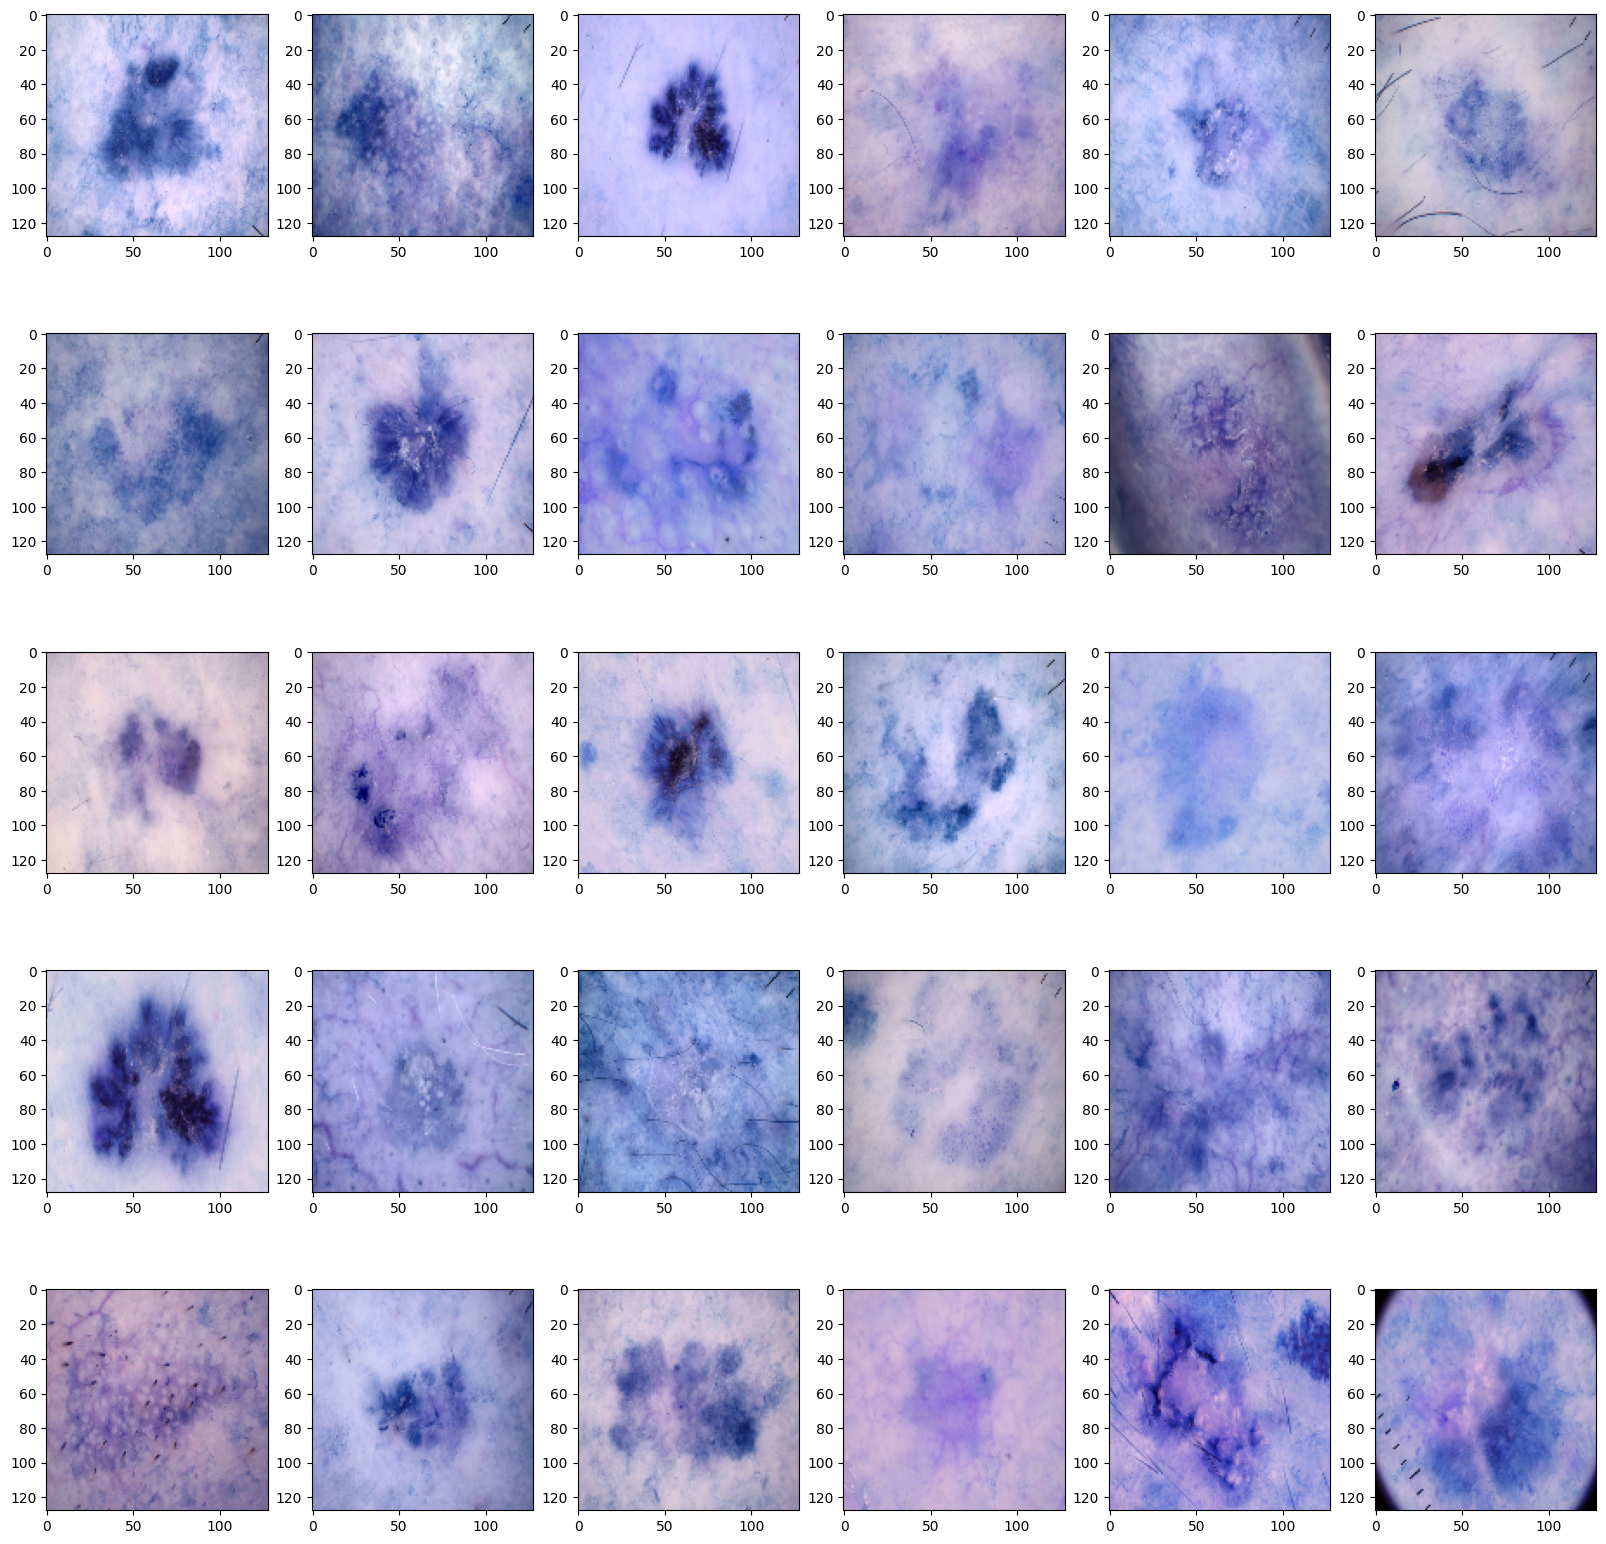

In [8]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(images[i])

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height,img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(np.unique(labels)), activation='softmax')
])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,943,433 (49.38 MB)

 Trainable params: 12,943,433 (49.38 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=200, validation_data=(X_test, y_test))


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 262ms/step - accuracy: 0.2218 - loss: 2.1152 - val_accuracy: 0.4196 - val_loss: 1.7808
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.3546 - loss: 1.8024 - val_accuracy: 0.4821 - val_loss: 1.6423
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.4018 - loss: 1.6447 - val_accuracy: 0.4129 - val_loss: 1.5571
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.4054 - loss: 1.6148 - val_accuracy: 0.5156 - val_loss: 1.4529
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.4515 - loss: 1.5393 - val_accuracy: 0.5112 - val_loss: 1.4158
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.4874 - loss: 1.4353 - val_accuracy: 0.5022 - val_loss: 1.5551
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.4316 - loss: 1.5776 - val_accuracy: 0.5134 - val_loss: 1.4045
Epoch 8/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.4801 - loss: 1.4829 - val_accuracy: 0.4

In [11]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {accuracy*100:.2f}%")


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8085 - loss: 0.4677
Training Accuracy: 83.14%


In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"test Accuracy: {accuracy*100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5822 - loss: 1.4338
test Accuracy: 58.93%


In [13]:
def predict_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (img_height, img_width))
    image = np.expand_dims(image, axis=0) / 255.0
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class
classes = os.listdir(data_dir)
image_path = "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma/ISIC_0011410.jpg"
predicted_class = predict_image(image_path)
predicted_label = classes[predicted_class[0]]
print(f"Predicted class: {predicted_class[0]} - {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
Predicted class: 0 - squamous cell carcinoma


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


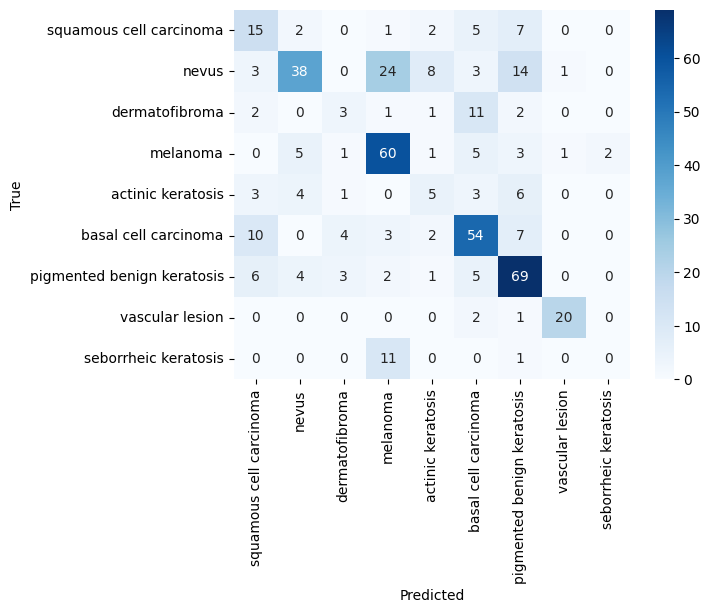

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [28]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test,axis = 1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [34]:
# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes) # use y_true_classes instead of y_test
precision = precision_score(y_true_classes, y_pred_classes, average='weighted') # use y_true_classes instead of y_test
recall = recall_score(y_true_classes, y_pred_classes, average='weighted') # use y_true_classes instead of y_test
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted') # use y_true_classes instead of y_test

# Store metrics
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

# Calculate average metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)

print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Average Accuracy: 0.5893
Average Precision: 0.5812
Average Recall: 0.5893
Average F1 Score: 0.5726


In [18]:
test_generator = datagen.flow(X_test, y_test, batch_size=32)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


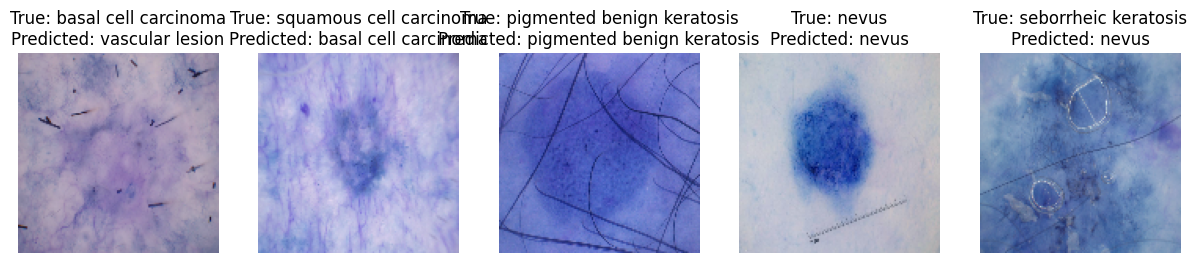

In [26]:
# Predicting on test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Ensure y_test has the correct shape (e.g., one-hot encoded)
if len(y_test.shape) == 1:
    # If y_test is flattened, convert it back to one-hot encoding
    num_classes = predictions.shape[1]  # Get the number of classes from predictions
    y_test = np.eye(num_classes)[y_test]

true_classes = np.argmax(y_test, axis=1)

# Visualizing predictions
def plot_predictions(images, true_labels, predicted_labels, class_names, n=5):
    plt.figure(figsize=(15, 15))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[true_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Define class names
class_names = os.listdir(data_dir)

# Plot the first 5 predictions
plot_predictions(X_test[:5], true_classes[:5], predicted_classes[:5], class_names)

In [31]:
from sklearn.metrics import classification_report
report = classification_report(y_true_classes , y_pred_classes , target_names = classes)
print(report)

                            precision    recall  f1-score   support

   squamous cell carcinoma       0.38      0.47      0.42        32
                     nevus       0.72      0.42      0.53        91
            dermatofibroma       0.25      0.15      0.19        20
                  melanoma       0.59      0.77      0.67        78
         actinic keratosis       0.25      0.23      0.24        22
      basal cell carcinoma       0.61      0.68      0.64        80
pigmented benign keratosis       0.63      0.77      0.69        90
           vascular lesion       0.91      0.87      0.89        23
      seborrheic keratosis       0.00      0.00      0.00        12

                  accuracy                           0.59       448
                 macro avg       0.48      0.48      0.47       448
              weighted avg       0.58      0.59      0.57       448

